# Class Handout: Interpretting Table 1 and Discussion

In table 1 of the class handout we have data from a paper that reports the rates of solvolysis of benzyltosylates in acetic acid. The Hammett plot of that data shows two competing mechansims. Lets plot the data and see if we get the same results as the authors.

"Acetolysis reactivities of substituted benzyl and polycyclic arylmethyl p- toluenesulfonates. Correlations with SCF-π and CNDO MO methods." A. Streitwieser Jr., e. al., *J. Am. Chem. Soc.*, **1970**, *92*, 5141-5150 https://doi.org/10.1021/ja00720a025

The code below will take the data set and LFER parameters available via github and create a dataframe with the Hammett plot data.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_16/data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

sigmatype = "s_plus"    # change to "sigma", "s_plus", or "s_minus"


###################################################################
### a function to fill in sigma for empty spaces in s+ and s-   ###
###################################################################

def fill_sigma(df):     
    for z in df.index:
        if np.isnan(df.loc[z,"s_plus"]):
            df.loc[z,"s_plus"] = df.loc[z,"sigma"]
        if np.isnan(df["s_minus"][z]):
            df.loc[z,"s_minus"] = df.loc[z,"sigma"]
    return(df)


################################################################################
### Read data set. The fields are separated by commas; comments are enabled  ###
################################################################################

#LFER_file = "LFER_HanschLeoTaft.csv"
LFER_file = "LFER_Williams.csv"

data_set = pd.read_csv(github_location_LFER_tables + LFER_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 


########################################################
### Fill across sigma values and select substituents ###
########################################################

data_set=fill_sigma(data_set)

### Remove unneeded columns
if LFER_file == "LFER_HanschLeoTaft.csv":
    data_set.drop(labels = ["TABLE V", "TABLE I"],      #Trim "LFER_HanschLeoTaft.csv" data
    axis = 1,
    inplace = True)
elif LFER_file == "LFER_Williams.csv":
    data_set.drop(labels = ["Page"],                   #Trim "LFER_Williams.csv"" data
    axis = 1,
    inplace = True)
else:
    print("ERROR: No filename")


################################################################################
### Read table 1 data. The fields are separated by commas; comments are enabled  ###
################################################################################

data_file = "Table_1_data.csv"

table_data_df = pd.read_csv(github_location + data_file,
                 delimiter = ",", 
                 skipinitialspace=True, 
                 index_col="Substituent", 
                 comment = "#") 

### Join the two dataframes according to the index column (Substituent)
df = pd.concat([table_data_df, data_set], axis=1, join="inner")

df.sort_values(by=[sigmatype], inplace=True)    # sort according to sigma so we can pick the left-most and right-most points more easily

df["logk"] = np.log10(df["k"])


display(df)


,k,sigma,s_plus,s_minus,logk
Substituent,,,,,
p-CH3,96.3000,-0.14,-0.31,-0.17,1.983626
p-F,4.1900,0.06,-0.07,-0.03,0.622214
m-CH3,4.5400,-0.06,-0.06,-0.06,0.657056
H,1.7100,0.00,0.00,0.00,0.232996
p-Cl,0.8620,0.23,0.11,0.19,-0.064493
m-Cl,0.0871,0.37,0.37,0.37,-1.059982
m-CF3,0.0446,0.46,0.46,0.46,-1.350665
p-CF3,0.0277,0.53,0.53,0.65,-1.557520


## Hammett Plot

We now have the data with substituent parameters and have calculated log(k). Let us plot the Hammett plot.

slope = -4.0341
intercept = 0.452
RSQ = 0.983654
p value = 0.000001
stderr for slope = 0.212303
stderr for intercept = 0.452295


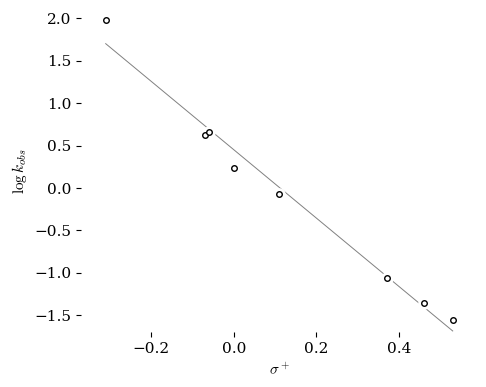

In [50]:
from scipy.stats import linregress

############################################
### Pick the x and y data for the plot   ###
############################################

x = df[sigmatype]
y = df["logk"]


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"


ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=x_label,
#          xlim=[-.4,.6],                  
          ylim=[-1.7,2.1]
      )
#########################################
### Plot the data and the line fit.   ###
#########################################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(x,y)
    
    fitx = np.linspace(np.min(x), np.max(x), 100)
    fity = linfit.slope * fitx + linfit.intercept

    ax.plot(fitx, fity, color='grey', zorder=1, linewidth=0.7)

    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")
    print(f"p value = {(linfit.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit.intercept):0.6f}")
    

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


## Plotting the Residuals

You should always eyeball a plot of the resuduals for any line fit. It may appear to fit well but if we see a systematic variation (high on the ends, low in the middle or an s-curve, etc.) then we should suspect that our model is not capturing all the information.

The code below will create a residual plot that we can examine.

0.9836540187689897


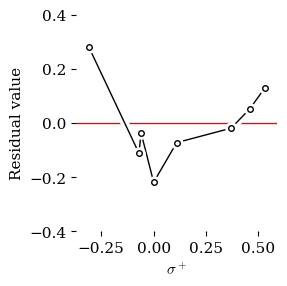

In [51]:
###########################################################
### Plot the residuals for product B vs. time in ax[1]  ###
###########################################################


model_y = fity = linfit.slope * x + linfit.intercept

### Calculate R^2 for First order fit
residuals = y - model_y
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

ax.set(ylabel=r"Residual value", 
       xlabel=x_label,
#          xlim=[-.4,.6],                  
          ylim=[-.4,0.4]      
      )
ax.axhline(y = 0.0, color = 'r', linestyle = '-')

### Plot the residuals 
ax.plot(x, residuals, "w-", linewidth = 6)   # a white thick line to erase background
ax.plot(x, residuals, "k-")                  # the thin black line that connects the dots


ax.scatter(x,residuals, s=64, color="white", zorder=3)    # white border around each point
ax.scatter(x,residuals, s=16, color="white", edgecolor = "black", zorder=3)  # the points



fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

slope1 = -3.1152
intercept1 = 0.090
RSQ_1 = 0.999379
p value = 0.015869
stderr for slope = 0.077667
stderr for intercept = 0.089511

slope1 = -5.5757
intercept1 = 0.261
RSQ_1 = 0.996892
p value = 0.001555
stderr for slope = 0.220153
stderr for intercept = 0.260646


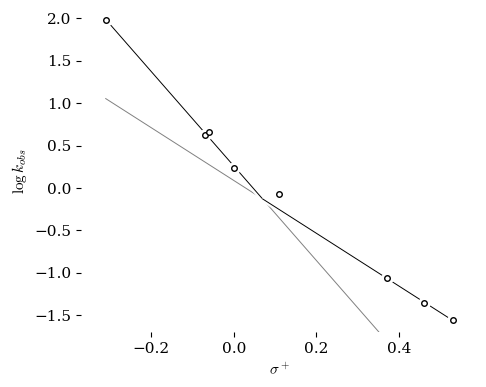

In [69]:
### This will pick the section of the plot with the HIGHER sigma values
top4x = x[0:4]     # Python numbers arrays from 0. This will slice of positions 0,1,2 and 3.
top4y = y[0:4]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[5:8]     # This will slice of positipns 5,6 and 7.
bot3y = y[5:8]

from scipy.stats import linregress

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


###################################################
### Plot the line fits across the full range.   ###
###################################################

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='grey', zorder=1, linewidth=0.7)

    linfit = linregress(top4x,top4y)

    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='grey', zorder=1, linewidth=0.7)

#########################################
### Plot the data and the line fit.   ###
#########################################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit_bot = linregress(bot3x,bot3y)
    linfit_top = linregress(top4x,top4y)

    linerange_bot = np.array((np.min(bot3x)-0.3, np.max(bot3x)))
    linerange_top = np.array((np.min(top4x), np.max(top4x)+0.068))

    fity_bot = linfit_bot.slope * linerange_bot + linfit_bot.intercept
    fity_top = linfit_top.slope * linerange_top + linfit_top.intercept

    ax.plot(linerange_bot, fity_bot, color='white', zorder=1, linewidth=4)
    ax.plot(linerange_top, fity_top, color='white', zorder=1, linewidth=4)

    ax.plot(linerange_bot, fity_bot, color='black', zorder=1, linewidth=0.7)
    ax.plot(linerange_top, fity_top, color='black', zorder=1, linewidth=0.7)

    print(f"slope1 = {linfit_bot.slope:0.4f}")
    print(f"intercept1 = {linfit_bot.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_bot.rvalue**2):0.6f}")
    print(f"p value = {(linfit_bot.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_bot.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_bot.intercept):0.6f}")

    print()
    
    print(f"slope1 = {linfit_top.slope:0.4f}")
    print(f"intercept1 = {linfit_top.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_top.rvalue**2):0.6f}")
    print(f"p value = {(linfit_top.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_top.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_top.intercept):0.6f}")
   
############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=x_label,
#          xlim=[-.4,.6],                  
          ylim=[-1.7,2.1]
      
      )

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


slope1 = -3.1152
intercept1 = 0.090
RSQ_1 = 0.999379
p value = 0.015869
stderr for slope = 0.077667
stderr for intercept = 0.089511

slope1 = -5.5757
intercept1 = 0.261
RSQ_1 = 0.996892
p value = 0.001555
stderr for slope = 0.220153
stderr for intercept = 0.260646
The R^2 value for curve is 0.9934


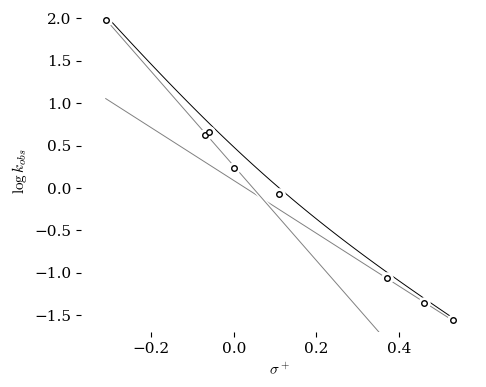

Substituent
p-CH3    2.036950
p-F      0.813377
m-CH3    0.765448
H        0.484484
p-Cl     0.000952
m-Cl    -0.990397
m-CF3   -1.298373
p-CF3   -1.530700
Name: s_plus, dtype: float64


In [75]:
### This will pick the section of the plot with the HIGHER sigma values
top4x = x[0:4]     # Python numbers arrays from 0. This will slice of positions 0,1,2 and 3.
top4y = y[0:4]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[5:8]     # This will slice of positipns 5,6 and 7.
bot3y = y[5:8]

from scipy.stats import linregress

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


###################################################
### Plot the line fits across the full range.   ###
###################################################

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    
    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='grey', zorder=1, linewidth=0.7)

    linfit = linregress(top4x,top4y)

    fity = linfit.slope * x + linfit.intercept
    ax.plot(x, fity, color='white', zorder=1, linewidth=3)
    ax.plot(x, fity, color='grey', zorder=1, linewidth=0.7)

#########################################
### Plot the data and the line fit.   ###
#########################################

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)

if True:   # Flag to run or not. True = run this section, False = skip it
    linfit_bot = linregress(bot3x,bot3y)
    linfit_top = linregress(top4x,top4y)

    print(f"slope1 = {linfit_bot.slope:0.4f}")
    print(f"intercept1 = {linfit_bot.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_bot.rvalue**2):0.6f}")
    print(f"p value = {(linfit_bot.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_bot.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_bot.intercept):0.6f}")

    print()
    
    print(f"slope1 = {linfit_top.slope:0.4f}")
    print(f"intercept1 = {linfit_top.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit_top.rvalue**2):0.6f}")
    print(f"p value = {(linfit_top.pvalue):0.6f}")
    print(f"stderr for slope = {(linfit_top.stderr):0.6f}")
    print(f"stderr for intercept = {(linfit_top.intercept):0.6f}")


    ###############################################################################
    ### Sum the rate constants and take the log for the total rate calculation ####
    ###############################################################################


    k_bot_calc = 10 ** (linfit_bot.slope * x + linfit_bot.intercept)
    k_top_calc = 10 ** (linfit_top.slope * x + linfit_top.intercept)

    total_k = k_top_calc + k_bot_calc
    total_y = np.log10(total_k)

    xrange = np.linspace(np.min(x), np.max(x), 100)
    k_bot_calc = 10 ** (linfit_bot.slope * xrange + linfit_bot.intercept)
    k_top_calc = 10 ** (linfit_top.slope * xrange + linfit_top.intercept)
    total_k = k_top_calc + k_bot_calc
    total_y_curve = np.log10(total_k)


    ax.plot(xrange, total_y_curve, color='black', zorder=1, linewidth=0.7)   # Plot model line a smooth curve
#    ax.plot(x, total_y, color='black', zorder=1, linewidth=0.7)             # Plot model line using data points only

    from scipy.stats import pearsonr

    rsq = pearsonr(x, total_y)
    print(f"The R^2 value for curve is {rsq.statistic**2:0.4f}")
   
############################
### Set labels and scale ###
############################

if sigmatype == "s_plus":
    x_label = r"$\sigma^+$"
elif sigmatype == "s_minus":
    x_label = r"$\sigma^-$"
elif sigmatype == "sigma":
    x_label = r"$\sigma$"
else:
    x_label = "ERROR"

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=x_label,
#          xlim=[-.4,.6],                  
          ylim=[-1.7,2.1]
      
      )

############################
### Print labels on plot ###
############################

if False:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

print(total_y)

0.9874913382916204


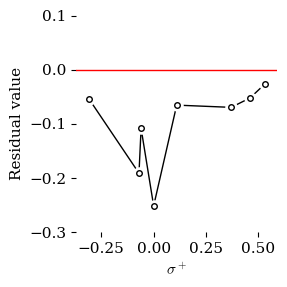

In [79]:
###########################################################
### Plot the residuals for log[toal k_obs] vs sigma+    ###
###########################################################


# y is experimental data
# total_y is the calculated results from the model of adding the two hammett plots together

### Calculate R^2 for First order fit
residuals = y - total_y
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
print(r_squared)

##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################

style_file = "tufte.mplstyle"
#style_file = "S2_classic2.mplstyle"

plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   

ax.set(ylabel=r"Residual value", 
       xlabel=x_label,
#          xlim=[-.4,.6],                  
          ylim=[-.3,0.1]      
      )
ax.axhline(y = 0.0, color = 'r', linestyle = '-')

### Plot the residuals 
ax.plot(x, residuals, "w-", linewidth = 6)   # a white thick line to erase background
ax.plot(x, residuals, "k-")                  # the thin black line that connects the dots


ax.scatter(x,residuals, s=64, color="white", zorder=3)    # white border around each point
ax.scatter(x,residuals, s=16, color="white", edgecolor = "black", zorder=3)  # the points



fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots

In [81]:
from scipy.optimize import curve_fit

def addingHammett(x, rho1, int1, rho2, int2):
    y_rx1 = rho1*x + int1
    y_rx2 = rho2*x + int2
    y_combined = np.log10(10**y_rx1+10**y_rx2)
    return(y_combined)

popt, pcov = curve_fit(addingHammett, x, y)
popt, pcov

(array([-3.31973284,  0.18296918, -6.92265847, -0.24124637]),
 array([[ 0.15798601, -0.07224732,  0.5020673 ,  0.17747184],
        [-0.07224732,  0.0344847 , -0.24163292, -0.08498979],
        [ 0.5020673 , -0.24163292,  1.91826268,  0.64323784],
        [ 0.17747184, -0.08498979,  0.64323784,  0.22337577]]))

slope1 = -3.1152
intercept1 = 0.090
RSQ_1 = 0.999379

slope1 = -5.5757
intercept1 = 0.261
RSQ_1 = 0.996892


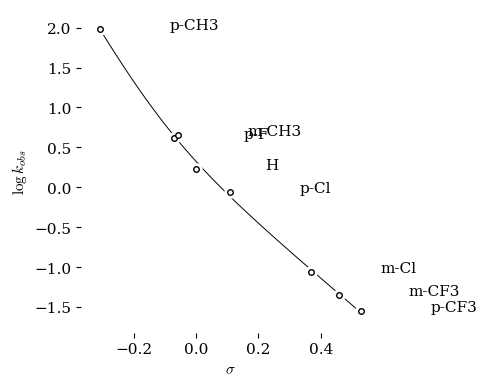

slope = -5.5757
intercept = 0.261
RSQ = 0.996892


In [55]:
### This will pick the section of the plot with the HIGHER sigma values
top4x = x[0:4]     # Python numbers arrays from 0. This will slice of positions 0,1,2 and 3.
top4y = y[0:4]

### This will pick the section of the plot with the LOWER sigma values
bot3x = x[5:8]     # This will slice of positipns 5,6 and 7.
bot3y = y[5:8]

xrange = np.linspace(np.min(x), np.max(x), 100)

from scipy.stats import linregress


##################################################
### Setup a figure with two plots side-by-side ###
### and choose a stylesheet                    ###
##################################################


style_file = "tufte.mplstyle"
plt.style.use(github_location_styles + style_file)        

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   


#########################################
### Plot the data and the line fit.   ###
#########################################


    
#ax.plot(x, y, color='black', zorder=1, linewidth=0.7)

ax.scatter(x,y, s=64, color="white", zorder=3)
ax.scatter(x,y, s=16, color="white", edgecolor = "black", zorder=3)


if True:   # Flag to run or not. True = run this section, False = skip it
    linfit = linregress(bot3x,bot3y)
    linerangebot = np.array((np.min(bot3x)-0.3, np.max(bot3x)))

    fitybot = linfit.slope * linerangebot + linfit.intercept
#    ax.plot(linerangebot, fitybot, color='black', zorder=1, linewidth=0.7)
    ybot = linfit.slope * xrange + linfit.intercept
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")
    print()
    
    linfit = linregress(top4x,top4y)
    linerangetop = np.array((np.min(top4x), np.max(top4x)+0.068))

    fitytop = linfit.slope * linerangetop + linfit.intercept
#    ax.plot(linerangetop, fitytop, color='black', zorder=1, linewidth=0.7)
    ytop = linfit.slope * xrange + linfit.intercept
    print(f"slope1 = {linfit.slope:0.4f}")
    print(f"intercept1 = {linfit.intercept:0.3f}")
    print(f"RSQ_1 = {(linfit.rvalue**2):0.6f}")

    ysum = np.log10(10**ytop+10**ybot)

    ax.plot(xrange, addingHammett(xrange, *popt), color='black', zorder=1, linewidth=0.7)


############################
### Set labels and scale ###
############################

ax.set(ylabel=r"$\log{k_{obs}}$", 
       xlabel=r"$\sigma$",
#          xlim=[-.4,.6],                  
#          ylim=[-.85,0.15]
      
      )

ax.margins(x=.07, y=.07, tight=True)      # add 7% empty space around outside of plot area   
############################
### Print labels on plot ###
############################

if True:      # Change to True to add annotations to the plot 
   names = list(df.index)
   for name,x_loc,y_loc in zip(names,x,y):
       plt.annotate(name,             # this is the text
                 (x_loc,y_loc),          # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(50,-0),  # distance from text to points (x,y)
                 ha='left')      # horizontal alignment can be left, right or center


#############################
### Output the final plot ###
#############################

fig.savefig("plot.pdf")   # use this to save the figure in PDF format
plt.show()                 # output the combined plot plots


#####################################
### Print the line fit parameters ###
#####################################

if True:         # Change to True to print a linear line fit results
    print(f"slope = {linfit.slope:0.4f}")
    print(f"intercept = {linfit.intercept:0.3f}")
    print(f"RSQ = {(linfit.rvalue**2):0.6f}")

In [56]:
print(popt)
print(pcov)
perr = np.sqrt(np.diag(pcov))
print(perr)

[-3.31973284  0.18296918 -6.92265847 -0.24124637]
[[ 0.15798601 -0.07224732  0.5020673   0.17747184]
 [-0.07224732  0.0344847  -0.24163292 -0.08498979]
 [ 0.5020673  -0.24163292  1.91826268  0.64323784]
 [ 0.17747184 -0.08498979  0.64323784  0.22337577]]
[0.39747454 0.18570056 1.3850136  0.47262646]
